# Taller de _Backpropagation_
## Entrenamiento de una red prealimentada

__Creado por:__ Angel Ayala ([Github](https://github.com/angel-ayala))

__Revisado:__ Francisco Cruz ([Sitio Web](http://www.franciscocruz.cl))

---

__Completado por:__ _indique su nombre aqui_

__Actualizado__: Viernes 7 de Mayo, 2021

__Fecha de Entrega__: Lunes 17 de Mayo, 2021

---

# Fundamentos Teóricos

Una red prealimentada, con $n$ entradas, $m$ salidas y una capa oculta de $p$ elementos, puede modelarse matemáticamente como:

\begin{equation}
    Y(t) = Wo^Tf_{NL}(W_i^TX(t)), \tag{1}
\end{equation}

con su error:

\begin{equation}
    E(t) = Y(t)-T(t), \tag{2}
\end{equation}

El algoritmo _backpropagation_ permite actualizar iterativamente los pesos de la red, retropropagándose el error cuadrático medio, dado por:

\begin{equation}
    E_{cm} = \frac{1}{s} \sum_{k=1}^m \sum_{t=1}^s e_k^2(t), \tag{3}
\end{equation}

con $s$ número de muestras y $e_k$ k-ésima componente del vector $E(t)$.

Este valor ($E_{cm}$) es la función objetivo a minimizar. Luego, se calcula el gradiente respecto a cada uno de los parámetros de la red, obteniendo:

\begin{equation}
    \Delta Wo = - \alpha * \frac{2}{s} * E(t) * Z^T(t), \tag{4}
\end{equation}

\begin{equation}
    \Delta Wt^T = - \alpha * \frac{2}{s} * Wo_j * \frac{\partial f_{NL}}{\partial Z_{in}} *X^T(t), \tag{5}
\end{equation}

con $\alpha$ como tasa de aprendizaje.

__Figura 1:__ Perceptrón multicapa de arquitectura 2x1x1. Cálculo de los valores delta en el algoritmo _backpropagation_.

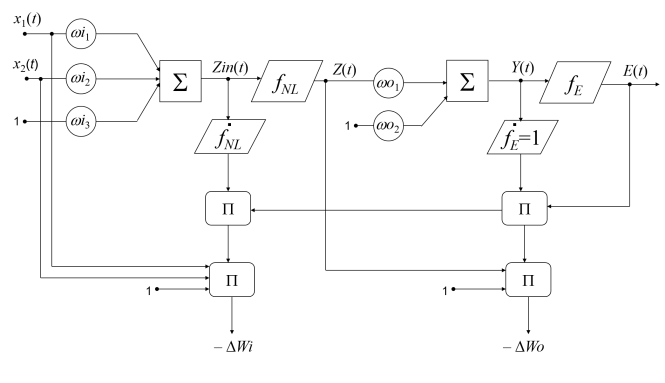

# Actividades
## Entrenar paso a paso una red prealimentada

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Datos de entrada
i = np.arange(1, 5)
x = np.array([[-2, -1, 0, 1],
              [-1, 0, 1, 2]])
t = np.array([-1.5, -1, 1, 1.5])

# numero de muestras o instancias de entrada
s = 4

In [ ]:
#@title Visualizar datos de entrada
plt.plot(i, t, 'r*-', label='Target')
plt.plot(i, x[0], 'bo-', label='Entrada 1')
plt.plot(i, x[1], 'bs-', label='Entrada 2')
plt.title('Datos para entrenar la red BP')
plt.legend()         
plt.show()

Calcular el gradiente de la función objetivo respecto a cada uno de los
parámetros (ver Fig. 1). Utilizar como función no lineal la función tangente hiperbólica.


\begin{equation}
    f_{NL}(x) = \frac{2}{1 + e^{-2x}} - 1, \tag{6}
\end{equation}

In [ ]:
def funcion_tangente(x):
    return (2 / (1 + np.exp(-2 * x))) - 1

def derivada_tangente(x):
    return (4 * np.exp(-2 * x) / np.power(1 - np.exp(-2 * x), 2))

(a) Graficar las entradas, target y salida de la red NO entrenada. Muestre las tres variables en un mismo gráfico.

In [ ]:
#@title Definir parámetros iniciales
wi1 = 0.0651
wi2 = -0.6970
wo = -0.1342
bi = 0
bo = -0.5481

In [ ]:
#@title feed forward
zini = np.zeros(s)
zi = np.zeros(s)
pred_y = np.zeros(s)

for k in range(s):
    zini[k] = wi1 * x[0, k] + wi2 * x[1, k] + bi
    zi[k]= funcion_tangente(zini[k])
    pred_y[k] = wo * zi[k] + bo

In [ ]:
#@title Visualización respuesta previo entrenamiento
plt.plot(i, t, 'r*-', label='Target')
plt.plot(i, pred_y, 'k+-', label='Salida')
plt.title('Respuesta de la red antes de entrenar')
plt.legend()
plt.show()

Entrenar la red con una tasa de aprendizaje de $\alpha = 0.01$. Itere durante 500 épocas.

In [ ]:
# epocas de entrenamiento
q = 500
# tasa de aprendizaje
alfa = 0.01
# almacenar calculos
ecm = np.zeros(q)
e = np.zeros(q)

# Algoritmo de entrenamiento
for ep in range(q):
    dEdbo = dEdwo = dEdbi = dEdwi1 = dEdwi2 = 0
    zin = np.zeros(s)
    z = np.zeros(s)
    y = np.zeros(s)

    for k in range(s):
        # Passo feed-forward
        zin[k] = wi1 * x[0, k] + wi2 * x[1, k] + bi
        z[k]= funcion_tangente(zin[k])
        # Calculo de la salida de la red
        y[k] = wo * z[k] + bo
        # Calculo del error
        e[k] = y[k] - t[k]
        # Calculo del error cuadrático medio
        ecm[ep] = ecm[ep] + (1.0 / s) * np.power(e[k], 2)

        # Calculo de deltas o gradientes (en la capa de salida solo se utiliza el error, ecuaciones 4 y 5)
        dEdbo = dEdbo + alfa * (2.0 / s) * e[k]
        dEdwo = dEdwo + alfa * (2.0 / s) * e[k] * z[k]
        # En la capa de entrada ademas de utiliza la derivada de la fc. de transferencia
        dEdbi = dEdbi + alfa * (2.0 / s) * e[k] * wo * derivada_tangente(zin[k])
        dEdwi1 = dEdwi1 + alfa * (2.0 / s) * e[k] * wo * derivada_tangente(zin[k]) * x[0, k]
        dEdwi2 = dEdwi2 + alfa * (2.0 / s) * e[k] * wo * derivada_tangente(zin[k]) * x[1, k];

    # Actualización de los pesos
    wi1 = wi1 - dEdwi1 
    wi2 = wi2 - dEdwi2
    bi = bi - dEdbi
    wo = wo - dEdwo
    bo = bo - dEdbo

(b) Una vez que la red ha sido entrenada, grafique el error cuadrático medio Ecm en función del número de épocas. Utilice una escala semi-logarítmica para el eje y.

In [ ]:
#@title Visualización de desempeño
plt.semilogy(range(q), ecm, 'b.', label='ECM')
plt.title('Error Cuadratico Medio de la red BP')
plt.xlabel('epocas')
plt.ylabel('performance')
plt.legend()
plt.show()

(c) Graficar las entradas, target y salida de la red ENTRENADA en un mismo gráfico.

In [ ]:
#@title Visualización datos entrenados
plt.plot(i, t, 'r*-', label='Target')
plt.plot(i, y, 'k+-', label='Salida')
plt.title('Respuesta de la red después de entrenar')
plt.legend()
plt.show()

# Responda

Realice cambios en la tasa de aprendizaje, en el número de épocas y en los valores iniciales de los parámetros de la red y comente. 

Las pruebas que deben realizar son las siguientes:

- Manteniendo el número de épocas en 500, variar la tasa de aprendizaje a $\alpha = 0.1$ , $\alpha = 0.001$, y $\alpha$ con un valor que ustedes escojan. Este último valor deben determinarlo de acuerdo a lo que observen en los distintos comportamientos, no obteniendo necesariamente mejores resultados, pero si concluir respecto a lo obtenido.

_Responda aquí_

- Manteniendo la tasa de aprendizaje en $\alpha = 0.01$, variar el número de épocas a 50, 1000 y un valor que ustedes determinen. Al igual que antes no deben obtener mejores resultados necesariamente, pero si
deben comentar lo obtenido.

_Responda aquí_

- Variar la tasa de aprendizaje $\alpha$ y el número de épocas de entrenamiento con valores que ustedes estimen convenientes de acuerdo a lo observado anteriormente. Lógicamente acá la idea es obtener mejores resultados, pero de no ser así se debe concluir porque no se obtienen.

_Responda aquí_

- Variar los valores iniciales de los pesos, al menos 2 conjuntos distintos de valores. Al tratarse de un problema de optimización la solución inicial cobra gran importancia.

_Responda aquí_

#### Observaciones:
- Debes crear una copia del notebook y guardarlo en Google Drive.
- En la [sección comente](#scrollTo=y3xT0ZT1uXu-&line=3&uniqifier=1), se debe explicar en las celdas de textos lo solicitado. Además, para cada prueba realizada se deben incluir los gráficos de desempeño ($E_{cm}$) y de la salida (junto con el target). Además, se deben realizar
comentarios de porque mejora o empeora el desempeño.

#### Evaluación:
- Para evaluar tu trabajo debes compartir el notebook y enviar el link a <aaam@ecomp.poli.br> con copia a <francisco.cruz@ucentral.cl>
- El notebook debe tener como nombre "Taller IA01 - Backpropagation - _nombreAlumno_.ipynb"
  - Ejemplo "Taller IA01 - Backpropagation - Alan Turing.ipynb"